# 基于注意力的双向长短时记忆网络关系分类

# 摘要：

关系分类是自然语言处理领域的一项重要研究任务。最先进的系统仍然依赖于词汇资源，如WordNet或NLP系统，如依赖解析器和命名实体识别器(NER)来获得高级特征。另一个挑战是重要的信息可以出现在句子的任何位置。为了解决这些问题，我们提出了基于注意力的双向长短时记忆网络(attl - blstm)来捕捉句子中最重要的语义信息。对SemEval-2010关系分类任务的初步结果表明，我们的方法优于现有的大多数方法，只使用单词向量

* 知识点:

1.目前RE问题的解决方法依赖于词汇资源，WordNet NER获得高级特征

2.本文为了从语义解决RE问题提出了基于Attention的Bi-LSTM网络。

# 1.简介

关系分类的任务是发现名词对之间的符号关系，这对于许多NLP应用都是有用的，如信息提取(Wu and Weld, 2010)，问答(Yao and Van Durme, 2014)。举个例子，下面的句子包含了主名花和教堂之间的实体-目的关系的一个例子。

鲜花/e1被带到教堂/e2。e1、/e1、e2、/e2是四个位置指示符，它们指定名词的开始和结束(Hendrickx et al.2009)。

传统的关系分类方法利用词汇资源的手工特征，通常基于模式匹配，并取得了较高的性能(Bunescuand Mooney, 2005;Mintz等，2009;Rink and Harabagiu, 2010)。这些方法的缺点之一是，许多传统的NLP系统被利用来提取高级特征，如部分语音标签、最短依赖路径和命名实体，从而导致计算成本的增加和额外的传播错误。另一个缺点是手工设计特征图非常耗时，而且由于不同训练数据集的覆盖率较低，泛化性能较差。

最近，深度学习方法提供了一种有效的方法来减少手工制作的功能的数量(Socher et al.， 2012;曾等，2014)。然而，这些方法仍然使用词汇资源，如WordNet (Miller, 1995)或依赖解析器和NER等NLP系统来获得高级特性。

提出了一种用于关系分类的新型神经网络attblstm。该模型利用双向长短时记忆网络(BLSTM)来提取句子中最重要的语义信息。该模型没有利用任何来自词汇资源或NLP系统的特性。

本文的贡献是利用带注意机制的BLST-M，在不使用额外知识和NLP系统的情况下，自动聚焦于对分类有决定性影响的单词，捕捉句子中最重要的语义信息。我们对SemEval-2010 Task 8数据集进行了实验，取得了84.0%的f1分，高于文献中现有的大部分方法。

本文的其余部分结构如下:在第二部分中，我们回顾了关系分类的相关工作。第3节详细介绍了我们的attblstm模型。第四部分详细介绍了实验评价的建立和实验结果。最后，我们在第5节中得出结论。





* 知识点:

1.关系分类的新型神经网络attention + bilstm

2.本文的贡献是利用带注意机制的BLST-M，在不使用额外知识和NLP系统的情况下，自动聚焦于对分类有决定性影响的单词，捕捉句子中最重要的语义信息

# 2.相关工作

多年来，人们提出了各种关系分类方法。它们大多基于模式匹配，并应用额外的NLP系统来获得词汇特征。Rink和Harabagiu(2010)提出了一项相关工作，该工作利用了外部语料库的许多特征来实现支持向量机分类器。

近年来，深度神经网络可以自动学习地下特征，并已在文献中得到应用。最具代表性的进展是Zeng et al.(2014)，他利用卷积神经网络(convolutional neural networks, CNN)进行关系分类。而CNN不适合学习长距离的语义信息，因此我们的方法建立在递归神经网络(RNN)的基础上(Mikolov et al.， 2010)。

Zhang和Wang(2015)提出了一项相关工作，利用双向的RN-N从原始文本da-ta中学习关系模式。虽然双向RNN可以同时访问过去和未来的上下文信息，但是由于梯度问题的消失，上下文的范围受到了限制。为了克服这个问题，Hochreiter和Schmidhuber(1997)引入了长短时记忆(LSTM)单元。

另一个相关的工作是Yan等人(2015)提出的SDP-LSTM模型。该模型利用了两个名之间的最短依赖路径(SDP)，然后利用LSTM单元沿着SDP获取异构信息。而我们的方法将原始文本视为一个序列。

最后，我们的工作与Zhang等人(2015)提出的BLSTM mod-el有关。该模型利用NLP工具和词法资源来获取单词、位置、POS、NER、依赖项解析和hypernym特性，并结合LSTM u-nits，取得了与最新技术相当的结果。但是，与Zhang等人(2015)所采用的复杂特征相比，我们的方法将e1、/e1、e2、/e2四个位置指标作为单字，将所有的单词转化为单词向量，形成一个简单但具有竞争性的模型。








* 知识点:

1.CNN不适合学习长距离的语义信息.

2.模型利用了两个名之间的最短依赖路径(SDP)，然后利用LSTM单元沿着SDP获取异构信息

# 3.模型

在本节中，我们详细地提出了attblstm模型。如图1所示，本文提出的模型包含五个部分:

(1)输入层:该模型的输入语句;

(2)嵌入层:将每个单词映射成一个低维向量;

(3) lstm层:利用BLSTM从步骤(2)得到高电平el特征;

(4)注意层:生成一个权向量，通过权向量的乘法，将每个时间步的词级特征合并为一个句子级特征向量;

(5)输出层:最后使用句子级特征向量机进行关系分类。

本节将详细介绍这些组件。

# 3.1 字嵌入

给出一个由T个单词组成的句子S = {x1, x2，…，每个单词xi被转换成实值向量ei。对于S中的每个单词，我们首先查找嵌入矩阵W wrd∈Rdw |V |，其中V为固定大小的词汇表，dw为单词嵌入的大小。矩阵wwrd是一个需要学习的参数，dw是一个用户需要选择的超参数。我们通过矩阵-向量积将一个词xi转化为其嵌入ei的词:

其中vi是大小为|V |的向量，它在索引ei处的值为1，在所有其他位置的值为0。然后将句子作为实值向量embs = {e1, e2，…， eT}。

# 3.2双向网络

LSTM机组最早是由Hochreiter和Schmidhuber(1997)提出的，用于克服梯度消失问题。其主要思想是引入一种自适应门控机制，该机制决定了LSTM单元保持原有s-tate的一致性，并记住当前数据输入的提取特征。然后提出了许多LSTM变体。我们采用了Graves等人(2013)提出的一种变体，它增加了从恒定误差传送带(CEC)到同一内存块的门的重量-ed窥视孔连接。通过直接使用当前单元状态来生成栅极度，窥视孔连接允许所有的栅极检查单元(即甚至当输出门关闭时(Graves, 2013)。

通常，基于lstm的递归神经网络由四个部分组成:一个输入门和相应的权矩阵
Wxi, Whi, Wci, bi;基于加权矩阵Wxf、Whf、Wcf、bf的一遗忘门ft;一个
输出门ot与相应的权矩阵
Wxo、Who、Wco、bo，所有这些门都设置为使用当前输入xi
因此，利用细胞以前的状态和细胞产生的电流信息计算加权和，得到当前细胞状态ct (Graves, 2013)。

对于许多序列建模任务，既可以访问过去的联系，也可以访问未来的联系，这是有益的。然而，标准的LSTM网络按时间顺序处理se-quences，忽略了将来的context。双向LSTM网络通过引入第二层对单向LSTM网络进行了扩展，在第二层中，隐藏到隐藏的连接以相反的时间顺序流动。因此，该模型能够利用过去和未来的信息。
在本文中，我们使用了BLSTM。如图1所示，网络包含左右序列上下文的两个子网络，它们分别向前和向后传递。第i个单词的输出如下等式所示:

在这里，我们使用元素明智的和来组合正向和反向传递输出。

# 3.3	Attention

Attention的神经网络最近在从回答问题、机器翻译、语音识别到图像字幕等一系列任务中取得了巨大的成功(赫尔曼-n等，2015;Bahdanau等，2014;Chorows-ki等，2015;徐等，2015)。在本节中，我们提出了关系分类任务的注意机制。设H为输出向量[h1, h2，…， hT]表示生成的LSTM层，其中T为句子长度。句子的表示由这些输出向量的加权和构成: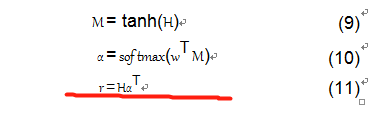

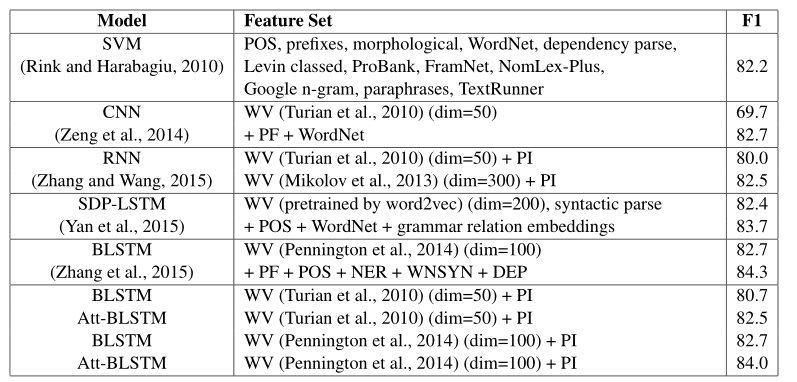
表1:与之前结果的比较。WV、PF、PI分别代表单词向量、位置特征和位置分别为指标。

# 3.4分类

在这个设置中，我们使用softmax分类器进行pre-dict标签ˆ从一组离散的类y句子s，分类器取隐藏状态h作为输入.

代价函数是负对数似然真正的类标签ˆy

其中t∈ℜm是一个炎热的代表地面实况和y∈ℜm估计的概率为每个类softmax (m是目标类的数量),和λ是一个L2正规化hyper-parameter。在本文中，我们将dropout和L2正则化相结合，以减轻过度拟合。

# 3.5正规化

(Hinton et al.， 2012)提出的Dropout，通过在正向传播过程中随机省略网络中的特征检测器，防止隐藏单元的协同自适应。我们雇用退学者
包埋层、LSTM层和penulti mate层。另外，我们通过重新标定w使其具有∥w = s来约束l2 -规范的权重向量，每当∥w经过一个梯度下降的步骤时，就会产生∥> s，如式15所示。培训细节将在第4.1节中进一步介绍。


# 4实验

# 4.1数据集和实验设置

实验在semvar -2010 task 8数据集上进行(Hendrickx et al.， 2009)。这dataset包含9个关系(具有两个方向)和一个无方向的其他类。有10717个带注释的例子，其中8000个句子用于培训，2717个句子用于测试。我们采用官方评价指标对我们的系统进行评价，该指标是基于九个实际关系(不包括其他关系)的宏观平均f1，并考虑方向性。

为了与Zhang和Wang(2015)的工作进行比较，我们使用了相同的词vector Turian等(2010)(50维)提出初始化嵌入层。此外，为了与Zhang等人(2015)的工作进行比较，我们还使用了Pennington等人(2014)预先训练的100维单词向量。

由于没有官方的开发数据集，我们随机选择了800句话进行验证。
我们的模型的超参数在每个任务的开发集上进行了调优。我们的模型使用AdaDelta (Zeiler, 2012)进行训练，学习率为1.0，小批量大小为10。对模型参数进行了正则化，每批L2正则化强度为10 - 5。我们评估了dropout嵌入层、dropout LSTM层和dropout倒数第二层的效果，当dropout率分别设置为0.3、0.3、0.5时，模型具有更好的性能。模型中的其他参数是随机初始化的。

# 4.2实验结果

表1将我们的attb - blstm与其他最先进的关系分类方法进行了比较。
支持向量机:这是2010年上半年执行得最好的系统。溜冰场和Harabagiu(2010)杠杆老化各种手工制作的特征，并使用SVM作为分类器。他们的f1 -分数达到了82.2%。

CNN: Zeng等人(2014)将一个句子作为一个序列数据，利用卷积人工神经网络学习句子层次特征，并利用特殊的位置向量对每个单词进行重发。然后将句子级特征和词法特征连接成一个向量，并将其输入到一个softmax分类器中进行预测。该模型的f1 -分数为82.7%。

RNN: Zhang和Wang(2015)使用了两种不同di-的双向RNN网络关系分类的表示词向量。使用Mikolovet al.(2013)预训练的300维单词向量，他们的f1 -得分为82.8%，使用Turian et al.(2010)预训练的50维单词向量，他们的f1 -得分为80.0%。我们的模型用同样的50维度词向量的f1 -分数为82.5%，比它们的分数高2.5%左右。

SDP-LSTM: Yan等人(2015)利用四个不同的通道沿不同方向拾取异质他们的f1 -得分为83.7%。与他们的模型相比，我们的模型将原始文本看作一个序列更简单。

BLSTM: Zhang等人(2015)利用NLP工具和词汇资源的多种特征，利用双向LSTM网络学习语义特征，并实现了这一目的在SemEval-2010 Task 8数据集上的最新性能。我们的模型用相同的词向量得到了非常相似的结果(84.0%)，而且我们的模型更简单。

我们提出的Att-BLSTM模型的f1 -评分为84.0%。它的性能优于大多数现有的竞争方法，无需使用词汇资源(如WordNet)或NLP系统(如dependency parser和NER)来获得高级特性。

# 5.结论

本文提出了一种新的关系分类神经网络模型attl - blstm。该模型不依赖于NLP工具或词法资源，而是使用带有位置指示器的原始文本作为输入。通过对SemEval-2010关系分类任务模型的评价，验证了该模型的有效性。

# 致谢

本研究由国家高新技术研究开发计划(No.2015AA015402)资助。我们感谢匿名评论者的深刻评论。